## EDA & Data Preprocessing on Google App Store Rating Dataset.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### 1. Import required libraries and read the dataset.


In [3]:
app_data=pd.read_csv('Apps_data+(1).csv')

### 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.


In [4]:
app_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
app_data.shape

(10841, 13)

There are 10841 rows and 13 columns in the dataset

In [6]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


### 3. Check summary statistics of the dataset. List out the columns that need to be worked upon for model building.


In [7]:
app_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,9367.0,4.193338,0.537431,1.0,4.0,4.3,4.5,19.0


Since there is only one column in the dataset with numerical data type so only one column can be described for now. Maximum value in the rating column is 19.0 which is invalid as rating cannot be larger than 5.

In [8]:
#Checking the unique values in the Rating column
app_data['Rating'].value_counts()

4.4     1109
4.3     1076
4.5     1038
4.2      952
4.6      823
4.1      708
4.0      568
4.7      499
3.9      386
3.8      303
5.0      274
3.7      239
4.8      234
3.6      174
3.5      163
3.4      128
3.3      102
4.9       87
3.0       83
3.1       69
3.2       64
2.9       45
2.8       42
2.7       25
2.6       25
2.5       21
2.3       20
2.4       19
1.0       16
2.2       14
1.9       13
2.0       12
1.7        8
1.8        8
2.1        8
1.6        4
1.4        3
1.5        3
1.2        1
19.0       1
Name: Rating, dtype: int64

There is only one entry in the Rating column which is invalid. So we will drop this entry

In [9]:
#Dropping the row with Rating = 19 from the dataset
app_data=app_data.drop(app_data[app_data['Rating']==19].index)
app_data.describe()

,Rating
count,9366.000000
mean,4.191757
std,0.515219
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,5.000000


### 4. Check if there are any duplicate records in the dataset? if any drop them.


In [10]:
app_data.duplicated().sum()

483

There are 483 duplicate rows in the dataset.
Dropping all the duplicate rows.

In [11]:
app_data.drop_duplicates(inplace=True)
app_data.duplicated().sum()

0

### 5. Check the unique categories of the column 'Category', Is there any invalid category? If yes, drop them.


In [12]:
app_data['Category'].value_counts()

FAMILY                 1943
GAME                   1121
TOOLS                   843
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         388
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AND_MAGAZINES      264
TRAVEL_AND_LOCAL        237
BOOKS_AND_REFERENCE     230
SHOPPING                224
DATING                  196
VIDEO_PLAYERS           175
MAPS_AND_NAVIGATION     137
EDUCATION               130
FOOD_AND_DRINK          124
ENTERTAINMENT           111
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
HOUSE_AND_HOME           80
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: Category, dtype: int64

All categories in the 'Category' column seems to be valid.

### 6. Check if there are missing values present in the column Rating, If any? drop them and and create a new column as 'Rating_category' by converting ratings to high and low categories(>3.5 is high rest low)

In [13]:
app_data.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

There are 1465 missing values in the column Rating


In [14]:
app_data=app_data.dropna()
app_data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [15]:
app_data['Rating_category']=app_data['Rating'].apply(lambda x:'High' if x>3.5 else 'Low')
app_data['Rating_category']

0        High
1        High
2        High
3        High
4        High
         ... 
10834    High
10836    High
10837    High
10839    High
10840    High
Name: Rating_category, Length: 8886, dtype: object

### 7. Check the distribution of the newly created column 'Rating_category' and comment on the distribution.


In [16]:
app_data['Rating_category'].value_counts()

High    8007
Low      879
Name: Rating_category, dtype: int64

There are around 4 times of the apps which have high rating as compared to the apps which have low rating,

C:\Users\Shashank Agarwal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating_category', ylabel='count'>

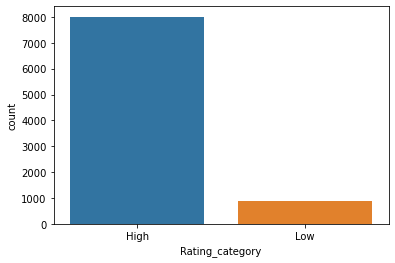

In [17]:
sns.countplot(app_data['Rating_category'])

### 8. Convert the column "Reviews'' to numeric data type and check the presence of outliers in the column and handle the outliers using a transformation approach.(Hint: Use log transformation)

In [18]:
#Changing the datatype of the 'Reviews' column
app_data['Reviews']=app_data['Reviews'].astype(int)

C:\Users\Shashank Agarwal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Reviews'>

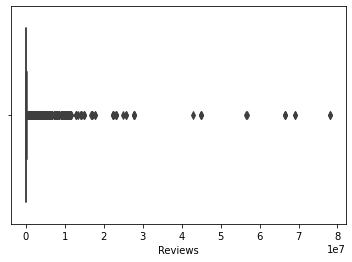

In [19]:
# Checking the presesnce of outliers using boxplot
sns.boxplot(app_data['Reviews'])

Removing the outliers in the 'Reviews' column

In [20]:
def remove_outliers(column):
    q1=column.describe()['25%']
    q3=column.describe()['75%']
    IQR=q3-q1
    minimum = q1-1.5*IQR
    maximum = q3+1.5*IQR
    return minimum,maximum

C:\Users\Shashank Agarwal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Reviews'>

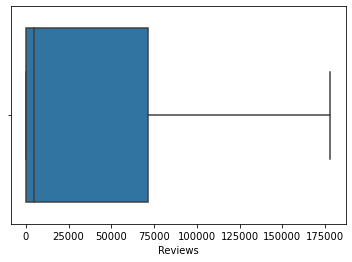

In [21]:
lr,ur = remove_outliers(app_data['Reviews'])
app_data['Reviews']=np.where(app_data['Reviews']>ur,ur,app_data['Reviews'])
app_data['Reviews']=np.where(app_data['Reviews']<lr,lr,app_data['Reviews'])
sns.boxplot(app_data['Reviews'])

### 9. The column 'Size' contains alphanumeric values, treat the non numeric data and convert the column into suitable data type. (hint: Replace M with 1 million and K with 1 thousand, and drop the entries where size='Varies with device')


In [22]:
app_data['Size']

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10834                  2.6M
10836                   53M
10837                  3.6M
10839    Varies with device
10840                   19M
Name: Size, Length: 8886, dtype: object

Dropping the entries where Size='Varies with device'

In [23]:
app_data=app_data.drop(app_data[app_data['Size']=='Varies with device'].index)

Replacing 'M' with '1000000' and 'k' with '1000' in each entry of column 'Size' and then multiplying the values using eval() funtion.

In [24]:
app_data['Size']=app_data['Size'].apply(lambda x:x.replace('M','*1000000'))
app_data['Size']=app_data['Size'].apply(lambda x:x.replace('k','*1000'))
app_data['Size']=app_data['Size'].apply(eval)

### 10. Check the column 'Installs', treat the unwanted characters and convert the column into a suitable data type.


In [25]:
app_data['Installs']

0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
            ...     
10833         1,000+
10834           500+
10836         5,000+
10837           100+
10840    10,000,000+
Name: Installs, Length: 7418, dtype: object

Removing ',' and '+' from each entries and changing the datatype from object to int

In [26]:
app_data['Installs']=app_data['Installs'].apply(lambda x:x.replace(',',''))
app_data['Installs']=app_data['Installs'].apply(lambda x:x.replace('+',''))
app_data['Installs']=app_data['Installs'].astype(int)

In [27]:
app_data['Installs']

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10833        1000
10834         500
10836        5000
10837         100
10840    10000000
Name: Installs, Length: 7418, dtype: int32

### 11. Check the column 'Price' , remove the unwanted characters and convert the column into a suitable data type.


In [28]:
app_data['Price'].value_counts()

0          6873
$0.99       103
$2.99        98
$4.99        61
$1.99        53
           ... 
$6.49         1
$1.29         1
$299.99       1
$379.99       1
$1.20         1
Name: Price, Length: 68, dtype: int64

Removing the '$' symbol using replace function and changing the datatype to int.

In [29]:
app_data['Price']=app_data['Price'].apply(lambda x:x.replace('$',''))
app_data['Price']=app_data['Price'].astype(float)

In [30]:
app_data['Price'].value_counts()

0.00      6873
0.99       103
2.99        98
4.99        61
1.99        53
          ... 
6.49         1
1.29         1
299.99       1
379.99       1
1.20         1
Name: Price, Length: 68, dtype: int64

### 12. Drop the columns which you think redundant for the analysis.(suggestion: drop column 'rating', since we created a new feature from it (i.e. rating_category) and the columns 'App', 'Rating' ,'Genres','Last Updated', 'Current Ver','Android Ver' columns since which are redundant for our analysis)


Dropping the columns 'App', 'Rating' ,'Genres','Last Updated', 'Current Ver','Android Ver'.

In [31]:
app_data.drop(['App', 'Rating' ,'Genres','Last Updated', 'Current Ver','Android Ver'],axis=1,inplace=True)
app_data

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
0,ART_AND_DESIGN,159.000,19000000.0,10000,Free,0.0,Everyone,High
1,ART_AND_DESIGN,967.000,14000000.0,500000,Free,0.0,Everyone,High
2,ART_AND_DESIGN,87510.000,8700000.0,5000000,Free,0.0,Everyone,High
3,ART_AND_DESIGN,178037.125,25000000.0,50000000,Free,0.0,Teen,High
4,ART_AND_DESIGN,967.000,2800000.0,100000,Free,0.0,Everyone,High
...,...,...,...,...,...,...,...,...
10833,BOOKS_AND_REFERENCE,44.000,619000.0,1000,Free,0.0,Everyone,High
10834,FAMILY,7.000,2600000.0,500,Free,0.0,Everyone,High
10836,FAMILY,38.000,53000000.0,5000,Free,0.0,Everyone,High
10837,FAMILY,4.000,3600000.0,100,Free,0.0,Everyone,High


### 13. Encode the categorical columns.

In [32]:
app_data['Content Rating'].value_counts()

Everyone           5952
Teen                832
Mature 17+          332
Everyone 10+        299
Adults only 18+       2
Unrated               1
Name: Content Rating, dtype: int64

Removing the entry with content rating = 'Unrated' 

In [33]:
app_data=app_data.drop(app_data[app_data['Content Rating']=='Unrated'].index)

Categorical columns in the dataset are 'Category','Type','Content Rating','Rating_category'. Encoding all these categorical columns

In [34]:
le = preprocessing.LabelEncoder()
app_data['Category']=le.fit_transform(app_data['Category'])
app_data['Type']=le.fit_transform(app_data['Type'])
app_data['Content Rating']=le.fit_transform(app_data['Content Rating'])
app_data['Rating_category']=le.fit_transform(app_data['Rating_category'])

app_data

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
0,0,159.000,19000000.0,10000,0,0.0,1,0
1,0,967.000,14000000.0,500000,0,0.0,1,0
2,0,87510.000,8700000.0,5000000,0,0.0,1,0
3,0,178037.125,25000000.0,50000000,0,0.0,4,0
4,0,967.000,2800000.0,100000,0,0.0,1,0
...,...,...,...,...,...,...,...,...
10833,3,44.000,619000.0,1000,0,0.0,1,0
10834,11,7.000,2600000.0,500,0,0.0,1,0
10836,11,38.000,53000000.0,5000,0,0.0,1,0
10837,11,4.000,3600000.0,100,0,0.0,1,0


### 14. Segregate the target and independent features (Hint: Use Rating_category as the target)

In [35]:
x_app_data=app_data.drop(['Rating_category'],axis=1)

x_app_data is the table for all the independent features and y_app_data is the table for target feature i.e. Rating_category

In [36]:
y_app_data=app_data[['Rating_category']]
y_app_data

,Rating_category
0,0
1,0
2,0
3,0
4,0
...,...
10833,0
10834,0
10836,0
10837,0


### 15. Split the dataset into train and test.


Spliting the dataset into test and train dataset.Taking 30% data in test data

In [37]:
x_train,x_test,y_train,y_test = train_test_split(x_app_data,y_app_data,test_size=0.30,random_state=True)

### 16. Standardize the data, so that the values are within a particular range.


In [38]:
x_train

,Category,Reviews,Size,Installs,Type,Price,Content Rating
5678,11,23609.0,31000000.0,1000000,0,0.0,4
8799,11,1985.0,3500000.0,500000,0,0.0,1
1564,18,601.0,5100000.0,100000,0,0.0,1
7853,11,445.0,29000000.0,50000,0,0.0,1
6975,12,396.0,12000000.0,10000,0,0.0,1
...,...,...,...,...,...,...,...
1523,17,126862.0,624000.0,10000000,0,0.0,1
7763,29,7063.0,17000000.0,1000000,0,0.0,1
5983,30,20.0,15000000.0,1000,0,0.0,1
349,6,30209.0,15000000.0,5000000,0,0.0,1


Standardizing all the numerical columns of the dataset

In [39]:
standard_scaler = StandardScaler()
x_train[['Reviews','Size','Installs','Price']] = standard_scaler.fit_transform(x_train[['Reviews','Size','Installs','Price']])
x_test[['Reviews','Size','Installs','Price']] = standard_scaler.fit_transform(x_test[['Reviews','Size','Installs','Price']])
x_train

,Category,Reviews,Size,Installs,Type,Price,Content Rating
5678,11,-0.202130,0.344633,-0.150579,0,-0.063504,4
8799,11,-0.555393,-0.826084,-0.161519,0,-0.063504,1
1564,18,-0.578003,-0.757969,-0.170271,0,-0.063504,1
7853,11,-0.580551,0.259490,-0.171365,0,-0.063504,1
6975,12,-0.581352,-0.464226,-0.172240,0,-0.063504,1
...,...,...,...,...,...,...,...
1523,17,1.484674,-0.948519,0.046345,0,-0.063504,1
7763,29,-0.472436,-0.251368,-0.150579,0,-0.063504,1
5983,30,-0.587494,-0.336511,-0.172437,0,-0.063504,1
349,6,-0.094309,-0.336511,-0.063057,0,-0.063504,1


In [40]:
app_data1=pd.read_csv('Apps_data+(1).csv')

In [41]:
app_data1['Rating'].value_counts()

4.4     1109
4.3     1076
4.5     1038
4.2      952
4.6      823
4.1      708
4.0      568
4.7      499
3.9      386
3.8      303
5.0      274
3.7      239
4.8      234
3.6      174
3.5      163
3.4      128
3.3      102
4.9       87
3.0       83
3.1       69
3.2       64
2.9       45
2.8       42
2.7       25
2.6       25
2.5       21
2.3       20
2.4       19
1.0       16
2.2       14
1.9       13
2.0       12
1.7        8
1.8        8
2.1        8
1.6        4
1.4        3
1.5        3
1.2        1
19.0       1
Name: Rating, dtype: int64

## Data Visualization on Honey Production dataset using seaborn and matplotlib libraries.

### 1. Import required libraries and read the dataset.


In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
honey_data=pd.read_csv('honeyproduction.csv')

### 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.


Checking the first five records of the data

In [44]:
honey_data.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [45]:
honey_data.shape

(626, 8)

There are 626 rows and 8 columns in the data

In [46]:
honey_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        626 non-null    object 
 1   numcol       626 non-null    float64
 2   yieldpercol  626 non-null    int64  
 3   totalprod    626 non-null    float64
 4   stocks       626 non-null    float64
 5   priceperlb   626 non-null    float64
 6   prodvalue    626 non-null    float64
 7   year         626 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 39.2+ KB


All the columns are in numerical data type except state.

### 3. Display the percentage distribution of the data in each year using the pie chart.

In [47]:
grouped_data=honey_data.groupby('year')['state'].count()
grouped_data

year
1998    43
1999    43
2000    43
2001    44
2002    44
2003    44
2004    41
2005    41
2006    41
2007    41
2008    41
2009    40
2010    40
2011    40
2012    40
Name: state, dtype: int64

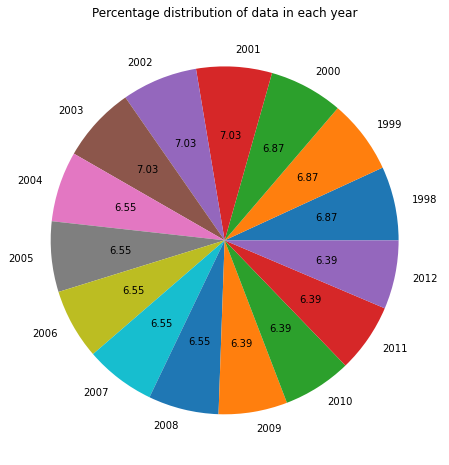

In [48]:
plt.figure(figsize=(8,8))
plt.pie(grouped_data,labels=grouped_data.index,autopct='%0.2f')
plt.title('Percentage distribution of data in each year')
plt.show()

From 2001 onwards, data was decreasing each year. It was maximum in year 2001 and minimum in the year 2012.

### 4. Plot and Understand the distribution of the variable "price per lb" using displot, and write your findings.


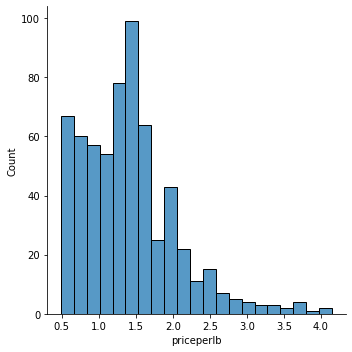

In [49]:
sns.displot(honey_data['priceperlb'])

Observations:
1. The distribution looks positively skewed with maximum observation in the price range of 1.2 to 1.5 dollars per pound.
2. Minimum number of observation lie in the range of 3.8 to 4 dollars per pound.

### 5. Plot and understand the relationship between the variables 'numcol' and 'prodval' through scatterplot, and write your findings.


<AxesSubplot:xlabel='numcol', ylabel='prodvalue'>

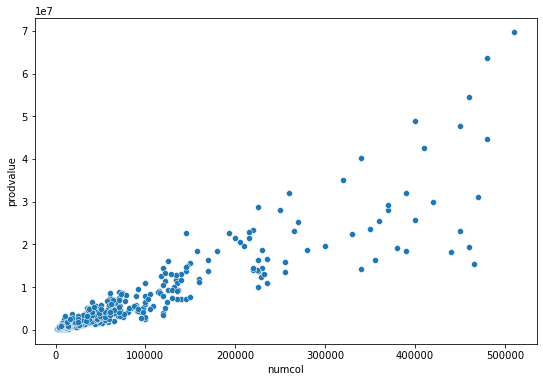

In [50]:
plt.figure(figsize=(9,6))
sns.scatterplot(y='prodvalue',x='numcol',data=honey_data)

Observations
1. There is an enough significant relationship between product value and numcol.
2. Both the features are positively correlated having correlation close to 1.
3. Most of the records have number of colonies less than 1.5 lacs.
4. And most of the records have production value less than 2 crores dollars.

### 6. Plot and understand the relationship between categorical variable 'year' and a numerical variable 'prodvalue' through boxplot, and write your findings.

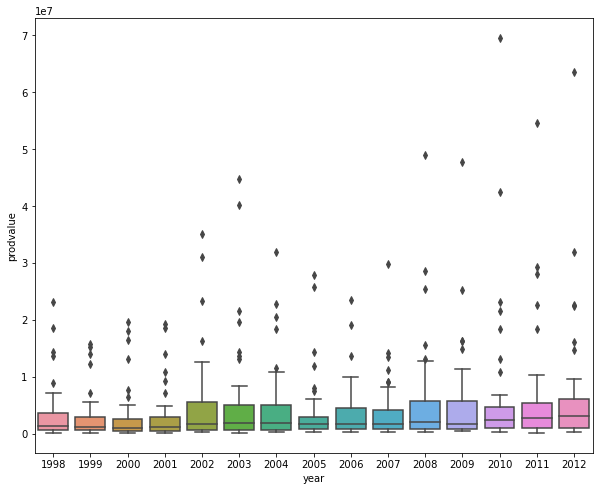

In [56]:
plt.figure(figsize=(10,8))
sns.boxplot(data=honey_data,x='year',y='prodvalue')
plt.show()

Observations
1. It can be estimated that there is an slight increment in the production value over the years from 1998 to 2012.
2. There are more outliers in the data for the years 2008 to 2012 as compared to other years.
3. Production value in each year from 1998 to 2012 is positively skewed.

### 7. Visualize and understand the relationship between the multiple pairs of variables throughout different years using pairplot and add your inferences. (use columns 'numcol', 'yield percol', 'total prod', 'prodvalue','year')


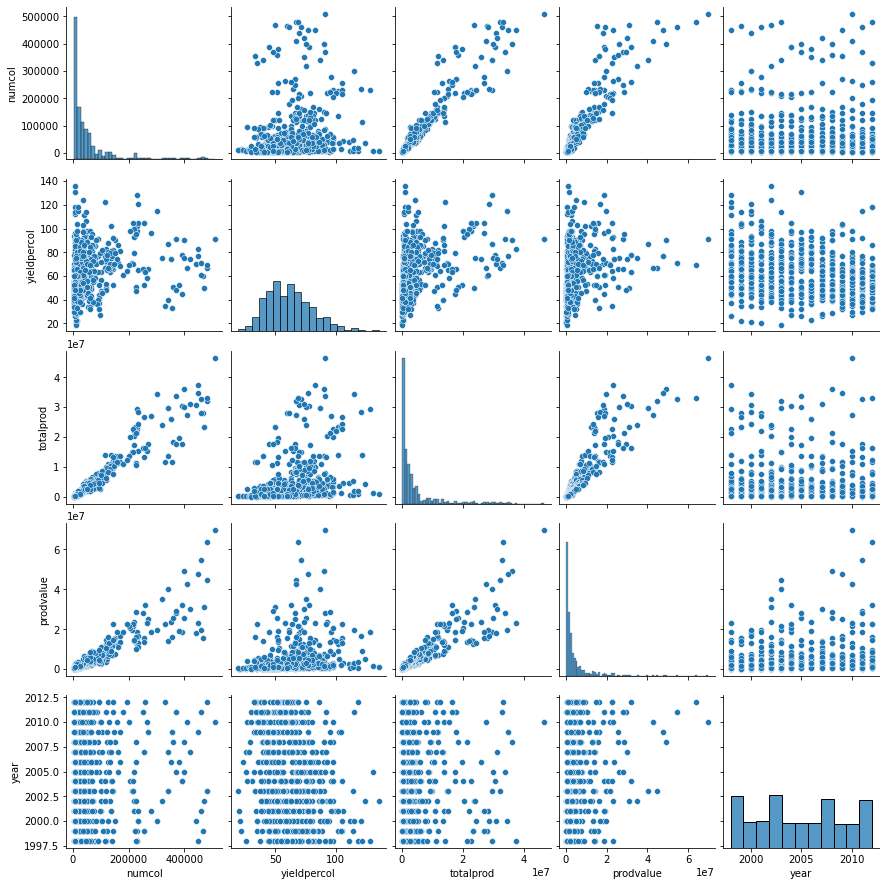

In [59]:
sns.pairplot(honey_data[['numcol', 'yieldpercol', 'totalprod', 'prodvalue','year']])

### 8. Display the correlation values using a plot and add your inferences. (use columns 'numcol', 'yield percol', 'total prod', 'stocks', 'price per lb', 'prodvalue'

In [441]:
correlation = honey_data.drop('year',axis=1).corr()

<AxesSubplot:>

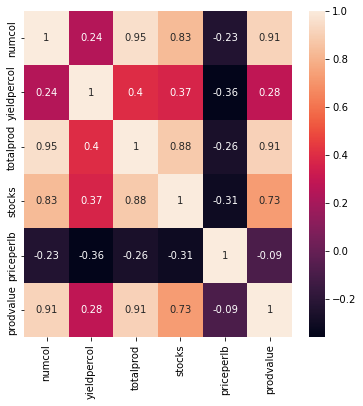

In [442]:
plt.figure(figsize=(6,6))
sns.heatmap(correlation,annot=True)

1. There is a high positive correlation between prodvalue and numcol i.e. 0.91
2. There is a high positive correlation between prodvalue and totalprod i.e. 0.91
3. There is a positive correlation between prodvalue and stocks i.e. 0.73
4. The correlation between prodvalue and priceperlb is almost zero